## Blending Images

In [1]:
import cv2

In [2]:
img1 = cv2.imread("DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.imshow(img1)

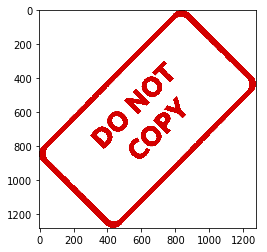

In [5]:
plt.imshow(img2)

In [6]:
img1.shape

(1401, 934, 3)

In [7]:
img2.shape

(1280, 1277, 3)

## Resizing the images

In [9]:
img1 = cv2.resize(img1, dsize=(600,600))
img2 = cv2.resize(img2, dsize=(600,600))

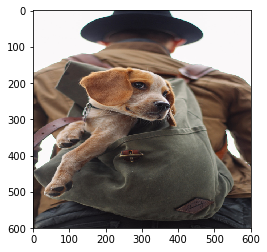

In [10]:
plt.imshow(img1)

In [11]:
img1.shape

(600, 600, 3)

### Blending the Image
​
We will blend the values together with the formula:
​
$$  img1 * \alpha  + img2 * \beta  + \gamma $$

In [15]:
blended = cv2.addWeighted(src1 = img1, alpha = 0.8,src2= img2, beta = 0.3, gamma = 0)

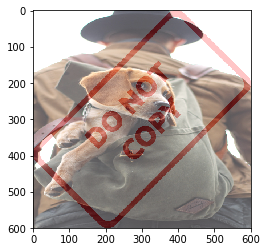

In [16]:
plt.imshow(blended)

## Overlaying Images of Different Sizes

We can use this quick trick to quickly overlap different sized images, by simply reassigning the larger image's values to match the smaller image.

In [21]:
# Load two images
img1 = cv2.imread('DATA/dog_backpack.png')
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

large_img = img1
small_img = img2

In [22]:
x_offset=0
y_offset=0

In [23]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

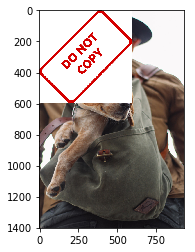

In [24]:
plt.imshow(large_img)

### Blending Images of Different Sizes

In [25]:
import numpy as np
import cv2

In [26]:
img1 = cv2.imread('DATA/dog_backpack.png')
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

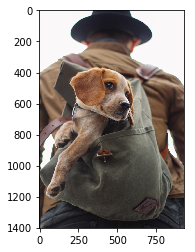

In [27]:
plt.imshow(img1)

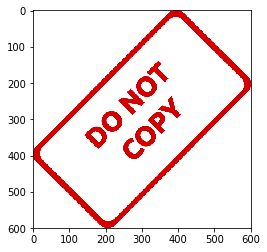

In [28]:
plt.imshow(img2)

### Create a Region of Interest (ROI)

In [29]:
img1.shape

(1401, 934, 3)

In [30]:
x_offset=934-600
y_offset=1401-600

In [31]:
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:1401,x_offset:943] # BOTTOM RIGHT CORNER

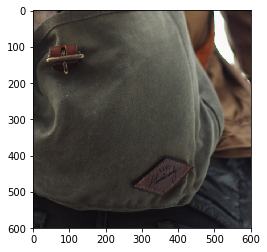

In [32]:
plt.imshow(roi)

In [33]:
roi.shape

(600, 600, 3)

### Creating a Mask

In [34]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [35]:
img2gray.shape

(600, 600)

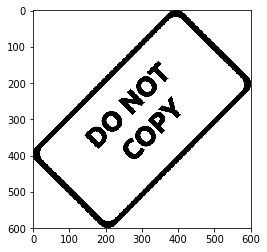

In [36]:
plt.imshow(img2gray,cmap='gray')

In [37]:
mask_inv = cv2.bitwise_not(img2gray)

In [38]:
mask_inv.shape

(600, 600)

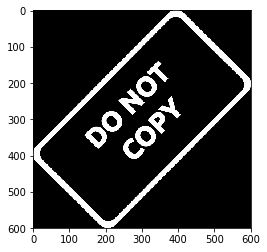

In [39]:
plt.imshow(mask_inv,cmap='gray')

### Convert Mask to have 3 channels

In [40]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [41]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [42]:
bk.shape

(600, 600, 3)

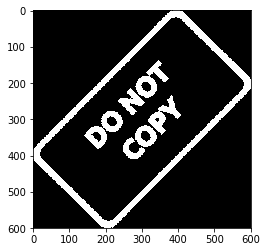

In [43]:
plt.imshow(bk)

### Grab Original FG image and place on top of Mask

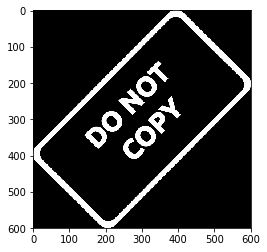

In [44]:
plt.imshow(mask_inv,cmap='gray')

In [45]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

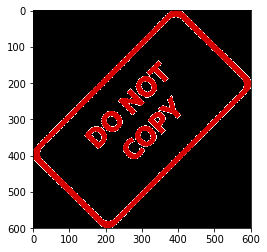

In [46]:
plt.imshow(fg)

In [47]:
fg.shape

(600, 600, 3)

### Get ROI and blend in the mask with the ROI

In [48]:
final_roi = cv2.bitwise_or(roi,fg)

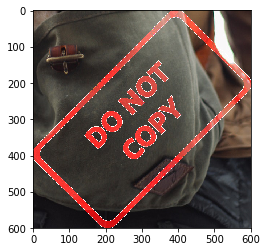

In [49]:
plt.imshow(final_roi)

### Now add in the rest of the image

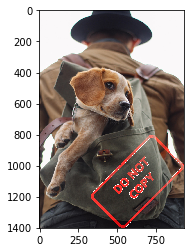

In [50]:
large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)